## MET CS 521 Final Project: <br> Predicting Housing Prices (Linear Regression) 
#### <i>Due: Friday, May 13th, 2022, 11:59PM EST</i>

Authors: Daniela Demaestri and Alex Mao<br>
GitHub usernames: ddemaest-bu and alexmao0501


### 1. Progammatically download a data-set for analysis.

In [3]:
import requests

In [33]:
url = "https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv"

In [34]:
r = requests.get(url, allow_redirects = True)

In [35]:
content = r.content

In [36]:
r.content.decode('utf-8')[:100]

'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Lan'

In [37]:
file = 'h.csv'
open(file,'wb').write(content)

950547

### 2. Preparing environment, importing modules, and taking a quick look at the dataset.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

#### Importing and reading csv file using pandas.

In [39]:
housing = pd.read_csv(file)

In [40]:
# preview dataset:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


#### Dataset shape - (# rows, # columns).
There are 2,919 rows and 81 columns

In [41]:
housing.shape

(2919, 81)

#### Preview some basic dataset information.
Some quick observations:
More than half of the columns (43) store "object" datatypes and, in other words, most likely refer to qualitative data. 38 columns contain numeric data (26 columns contain integer datatype and 12 columns conntain floats.

In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [43]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [44]:
housing.describe(exclude='number').T

,count,unique,top,freq
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
Alley,198,2,Grvl,120
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443
Condition1,2919,9,Norm,2511


In [45]:
housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

### 3. Taking a closer look at the data and understanding the data: 

#### Taking a closer look at columns with object datatypes.

In [46]:
# make a list of the columns that contain object datatype
column_dtype_object = []
for col in housing.columns:
    if housing[col].dtype == "object":
        column_dtype_object.append(col)

In [47]:
# look at all unique values per column with object datatypes:
for item in column_dtype_object:
    print(item + ':', list(housing[item].unique()))

MSZoning: ['RL', 'RM', 'C (all)', 'FV', 'RH', nan]
Street: ['Pave', 'Grvl']
Alley: [nan, 'Grvl', 'Pave']
LotShape: ['Reg', 'IR1', 'IR2', 'IR3']
LandContour: ['Lvl', 'Bnk', 'Low', 'HLS']
Utilities: ['AllPub', 'NoSeWa', nan]
LotConfig: ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
LandSlope: ['Gtl', 'Mod', 'Sev']
Neighborhood: ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Condition1: ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Condition2: ['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']
BldgType: ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
HouseStyle: ['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin']
RoofStyle: ['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed']
RoofMatl: ['CompShg', '

In [48]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram


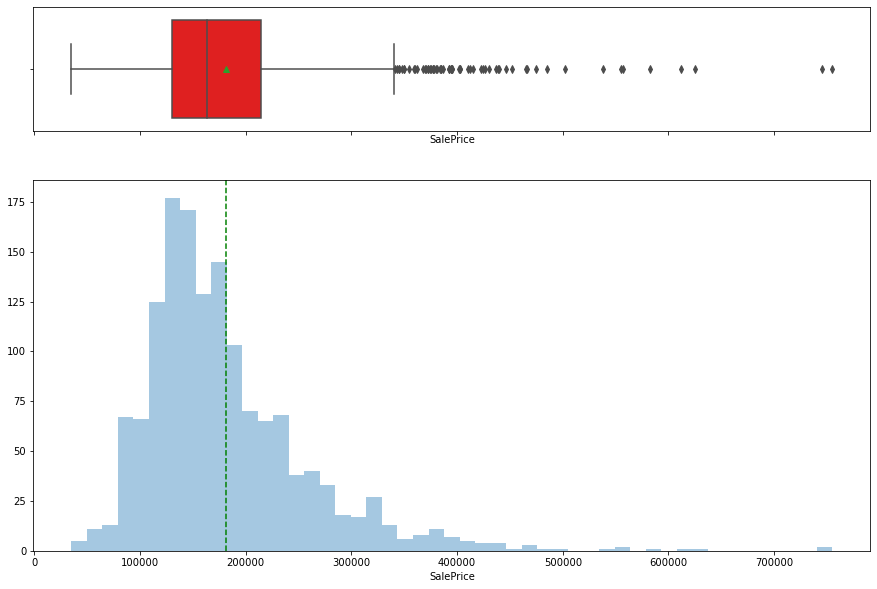

In [49]:
histogram_boxplot(housing.SalePrice)

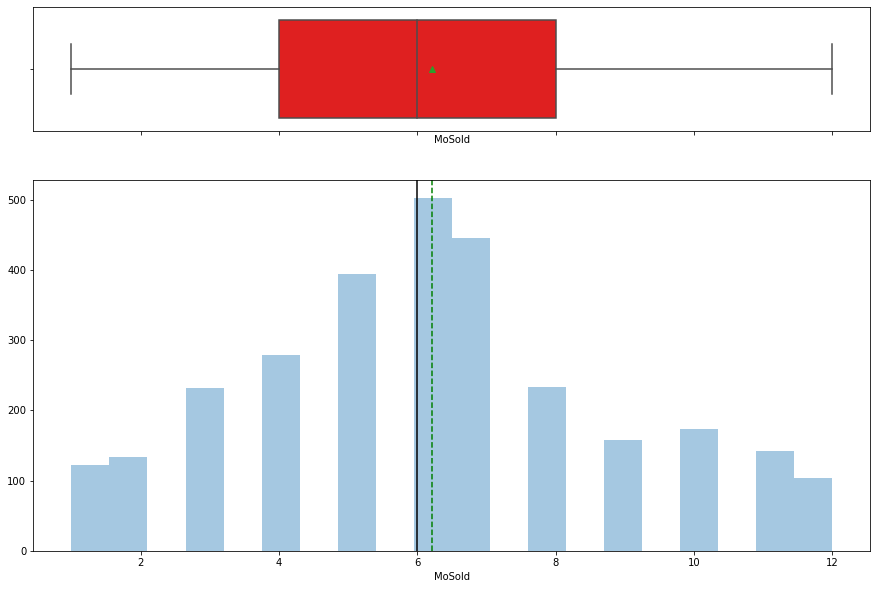

In [50]:
histogram_boxplot(housing.MoSold)

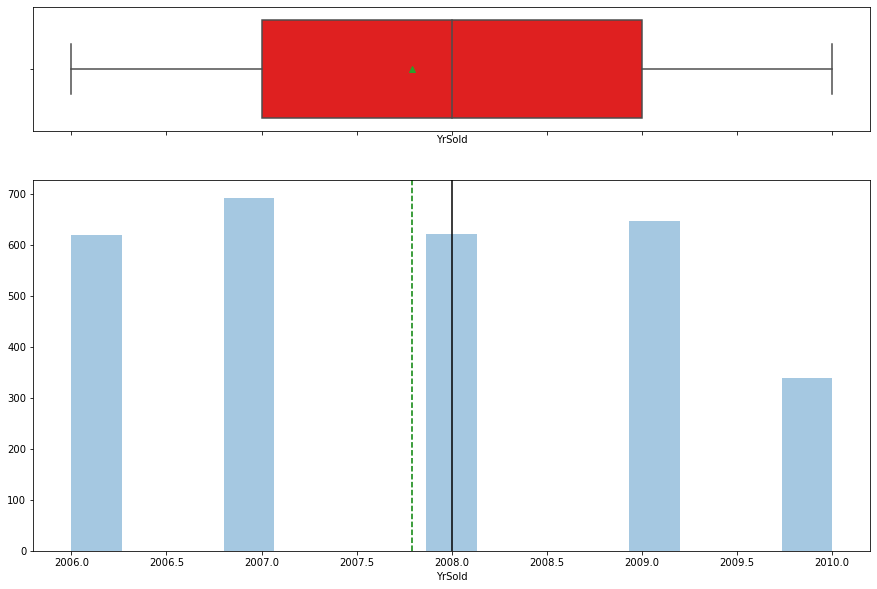

In [51]:
histogram_boxplot(housing.YrSold)

In [52]:
def bar_perc(data, z):
    
    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    #plt.xticks(rotation=45)
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
    plt.show() # show the plot

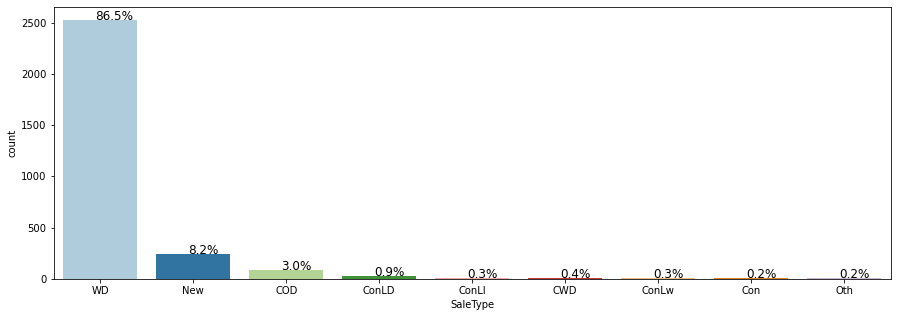

In [53]:
bar_perc(housing, 'SaleType')

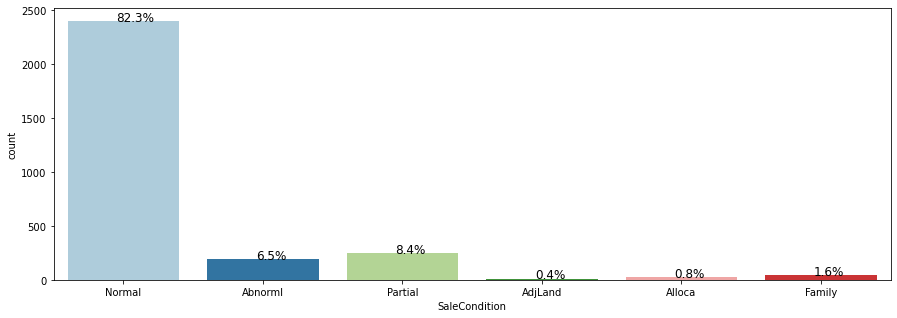

In [54]:
bar_perc(housing, 'SaleCondition')

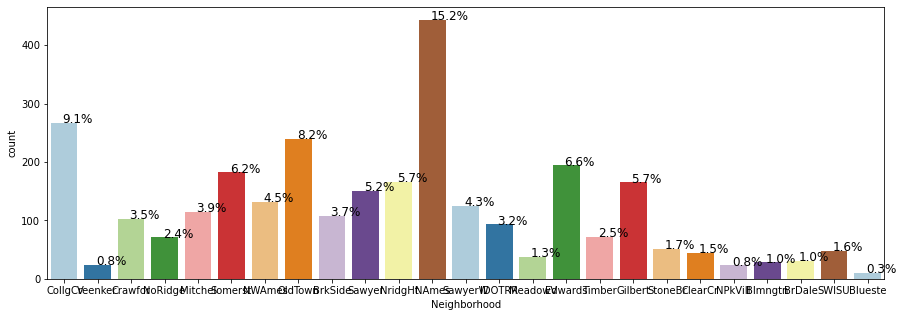

In [55]:
bar_perc(housing, 'Neighborhood')